In [768]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [770]:
#read data from excel
data = pd.read_excel("transactions.xlsx")

In [771]:
#head check for the first rows
print("Data Head:")
display(data.head())

Data Head:


,Transaction Number,Origin No.,Posting Date,Due Date,Month-YY,BP Code,BP Name,Sales Employee Name,Item No.,Item Description,...,Product Category,Selling Price,Actual Quantity Sold,Sales Value,Doc. Type,Region,Channel,Payment Terms,Gross Profit,Week
0,481205,53133,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102009,Chairs - Easy - White,...,Furniture,20640.403,50.0,1032020.15,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,403820.15,Wk5
1,480662,53129,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102012,Chairs - Easy - Green,...,Furniture,20640.403,2.0,41280.81,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,16152.81,Wk5
2,480662,53129,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102014,Chairs - Easy - Grey,...,Furniture,20640.403,2.0,41280.81,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,16152.81,Wk5
3,480662,53129,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102070,Chairs - Easy - Clip cap blue,...,Furniture,20640.403,2.0,41280.81,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,16152.81,Wk5
4,480662,53129,2024-01-31,31/01/24,Jan-24,CIND0824,UBL OUTLET - RETAIL,Mercy Zalwango,IN102079,Chairs - Easy - Purple,...,Furniture,20640.403,2.0,41280.81,IN,BUGOLOBI WALKINS,BUGOLOBI WALKINS,C_Cash,16152.81,Wk5


In [772]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Transaction Number    7499 non-null   int64         
 1   Origin No.            7499 non-null   int64         
 2   Posting Date          7499 non-null   datetime64[ns]
 3   Due Date              7499 non-null   object        
 4   Month-YY              7499 non-null   object        
 5   BP Code               7499 non-null   object        
 6   BP Name               7499 non-null   object        
 7   Sales Employee Name   7499 non-null   object        
 8   Item No.              7499 non-null   object        
 9   Item Description      7499 non-null   object        
 10  Item Subcategory      7499 non-null   object        
 11  Product Category      7470 non-null   object        
 12  Selling Price         7499 non-null   float64       
 13  Actual

In [776]:
print("\nSummary Statistics:")
display(data.describe())


Summary Statistics:


,Transaction Number,Origin No.,Posting Date,Selling Price,Actual Quantity Sold,Sales Value,Gross Profit
count,7499.000000,7499.000000,7499,7499.000000,7499.000000,7.499000e+03,7.499000e+03
mean,389680.640752,43993.665822,2023-08-04 19:08:53.351113472,6206.465440,465.052540,8.556997e+05,3.360999e+05
min,354153.000000,3091.000000,2023-01-02 00:00:00,0.000000,-5800.000000,-2.667458e+07,-2.517846e+07
25%,357926.000000,41074.000000,2023-04-02 00:00:00,0.000000,4.000000,0.000000e+00,0.000000e+00
50%,366586.000000,41884.000000,2023-08-02 00:00:00,2558.911200,20.000000,2.066970e+04,4.617390e+03
75%,369572.000000,42187.000000,2023-11-03 00:00:00,6096.472900,200.000000,2.687061e+05,6.680040e+04
max,481224.000000,53136.000000,2024-01-31 00:00:00,80508.540700,120000.000000,7.876224e+07,2.517846e+07
std,49330.899442,5621.276199,NaN,12024.467137,3244.907035,3.846797e+06,1.494945e+06


In [778]:
print("\nMissing Values per Column:")
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])


Missing Values per Column:


Product Category    29
dtype: int64

In [780]:
data['Product Category'].fillna('Unknown', inplace=True)

In [782]:
print("\nMissing Values per Column:")
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])


Missing Values per Column:


Series([], dtype: int64)

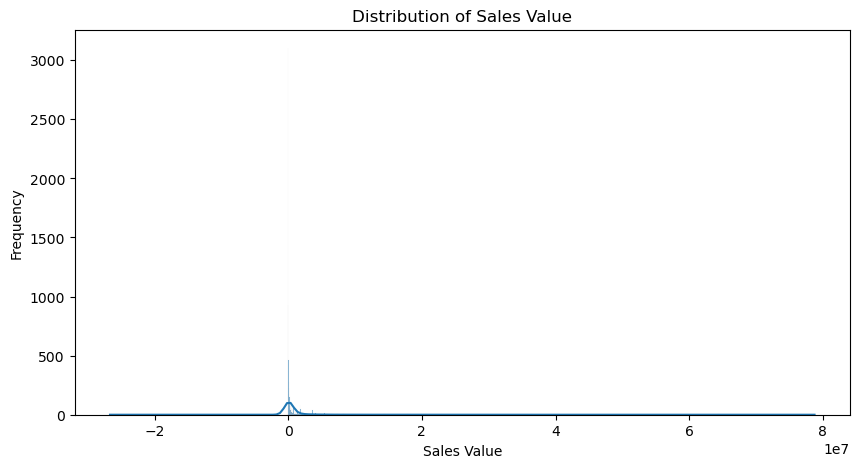

In [784]:
# Understanding the Distribution of the Target Variable (Sales Value)
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
plt.figure(figsize=(10, 5))
sns.histplot(data['Sales Value'], kde=True)
plt.title("Distribution of Sales Value")
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
plt.show()

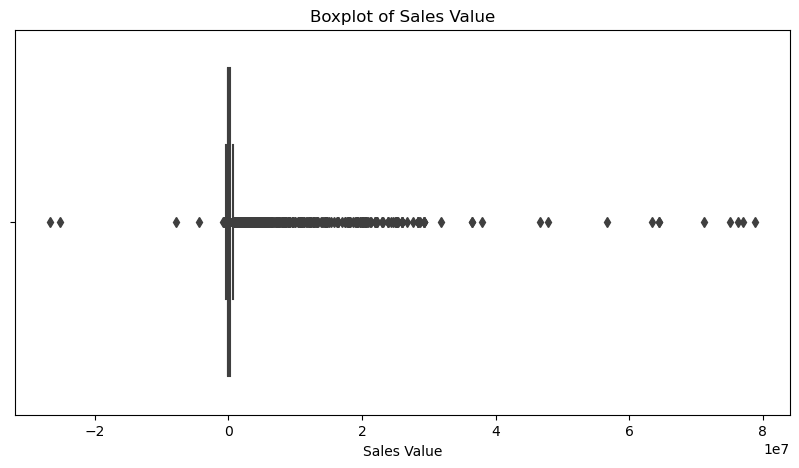

In [786]:
# Boxplot to identify outliers in the target variable
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Sales Value'])
plt.title("Boxplot of Sales Value")
plt.xlabel("Sales Value")
plt.show()


D:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


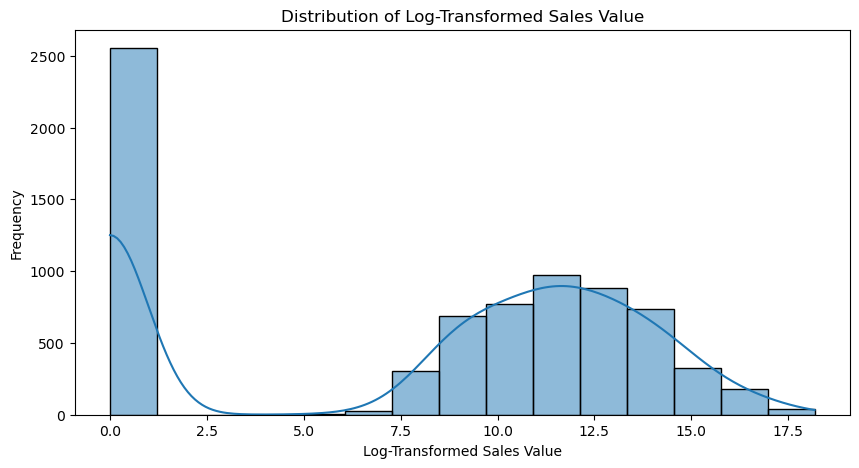

In [788]:
data['log_sales_value'] = np.log1p(data['Sales Value'])  # log1p handles zero values

plt.figure(figsize=(10, 5))
sns.histplot(data['log_sales_value'], kde=True)
plt.title("Distribution of Log-Transformed Sales Value")
plt.xlabel("Log-Transformed Sales Value")
plt.ylabel("Frequency")
plt.show()

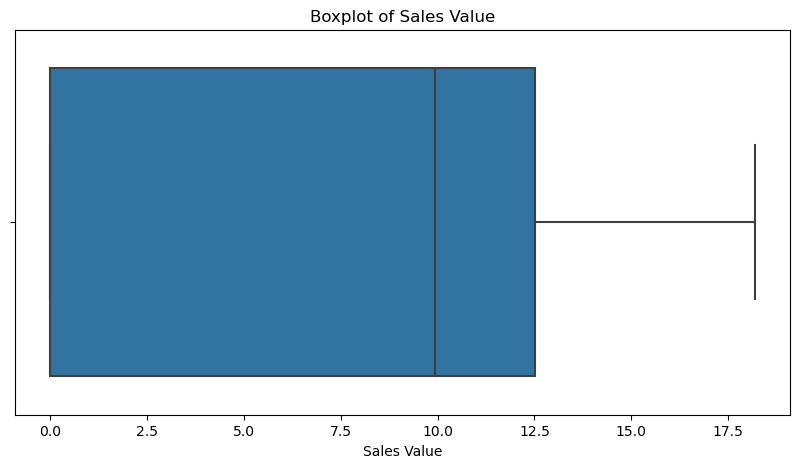

In [790]:
# Boxplot to identify outliers in the target variable
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['log_sales_value'])
plt.title("Boxplot of Sales Value")
plt.xlabel("Sales Value")
plt.show()

In [792]:
#checking for negatives
print((data['Sales Value'] < 0).sum())

23


In [794]:
#checking for zero values
print((data['Sales Value'] == 0).sum())

2554


In [796]:
data = data.copy()
data = data[data['Sales Value'] > 0]

In [798]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 0 to 7498
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Transaction Number    4922 non-null   int64         
 1   Origin No.            4922 non-null   int64         
 2   Posting Date          4922 non-null   datetime64[ns]
 3   Due Date              4922 non-null   object        
 4   Month-YY              4922 non-null   object        
 5   BP Code               4922 non-null   object        
 6   BP Name               4922 non-null   object        
 7   Sales Employee Name   4922 non-null   object        
 8   Item No.              4922 non-null   object        
 9   Item Description      4922 non-null   object        
 10  Item Subcategory      4922 non-null   object        
 11  Product Category      4922 non-null   object        
 12  Selling Price         4922 non-null   float64       
 13  Actual Quan

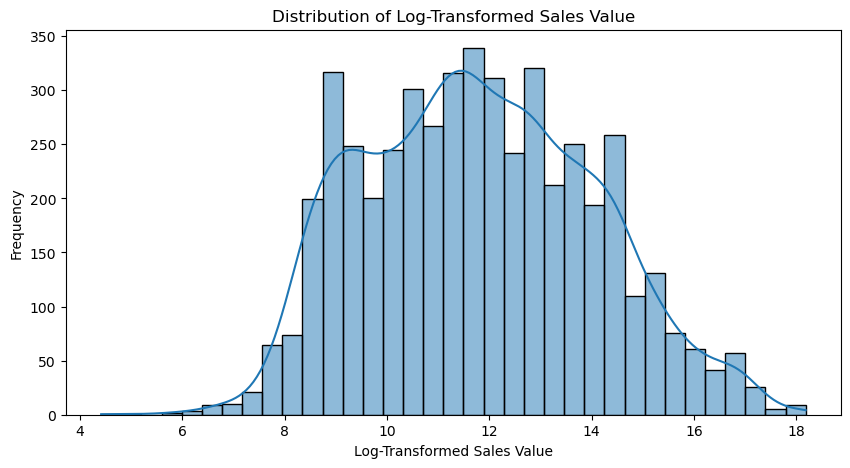

In [800]:
data['log_sales_value'] = np.log(data['Sales Value'])

plt.figure(figsize=(10, 5))
sns.histplot(data['log_sales_value'], kde=True)
plt.title("Distribution of Log-Transformed Sales Value")
plt.xlabel("Log-Transformed Sales Value")
plt.ylabel("Frequency")
plt.show()

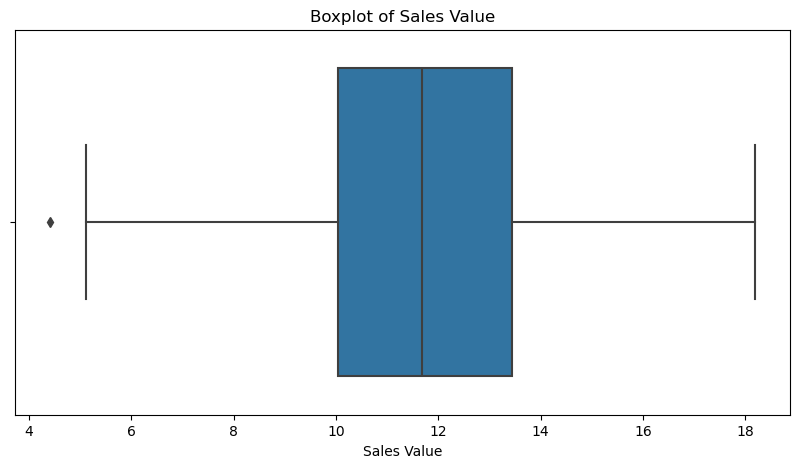

In [802]:
# Boxplot to identify outliers in the target variable
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['log_sales_value'])
plt.title("Boxplot of Sales Value")
plt.xlabel("Sales Value")
plt.show()

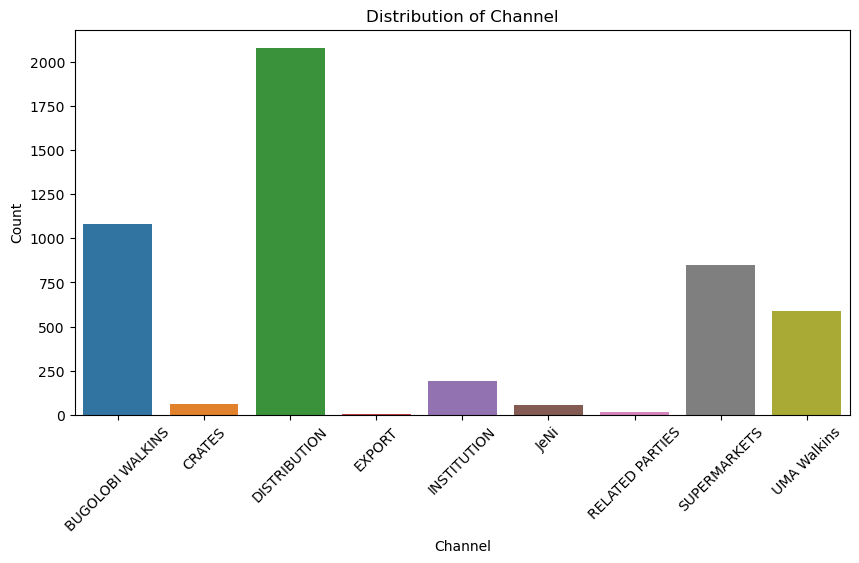

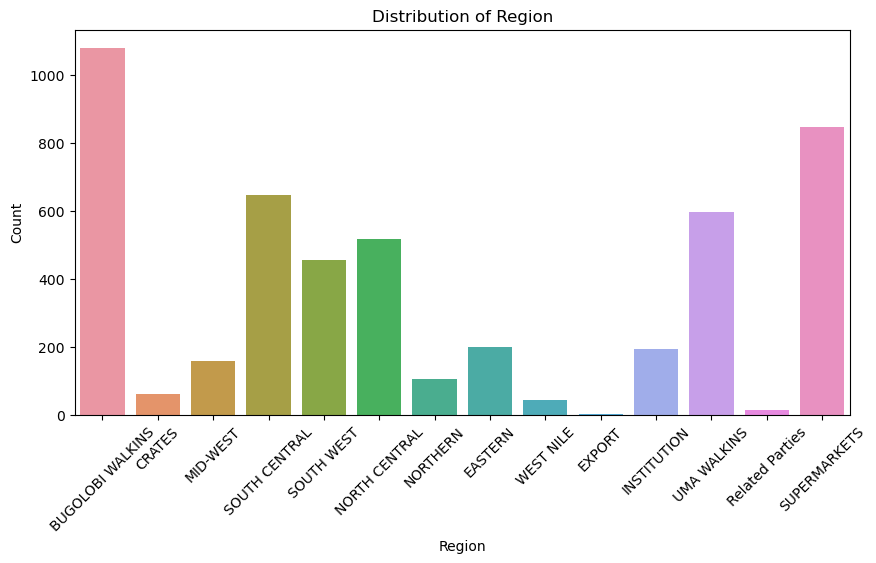

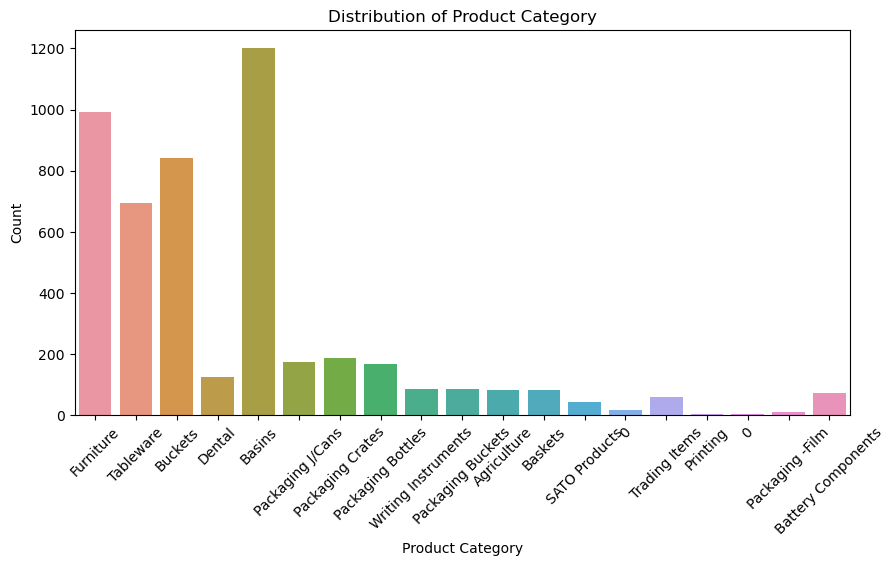

In [804]:
# Plot distribution of 'channel', 'region', 'product', and 'product category'
categorical_columns = ['Channel', 'Region', 'Product Category']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

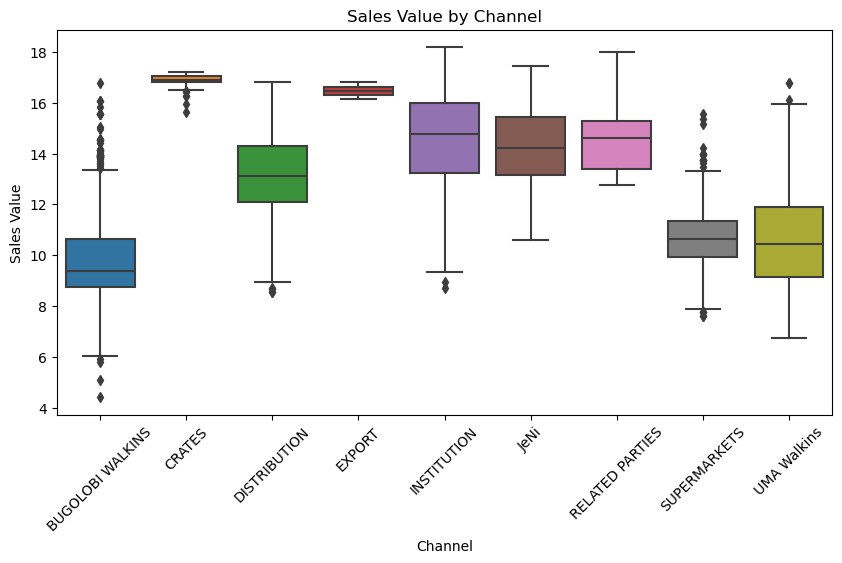

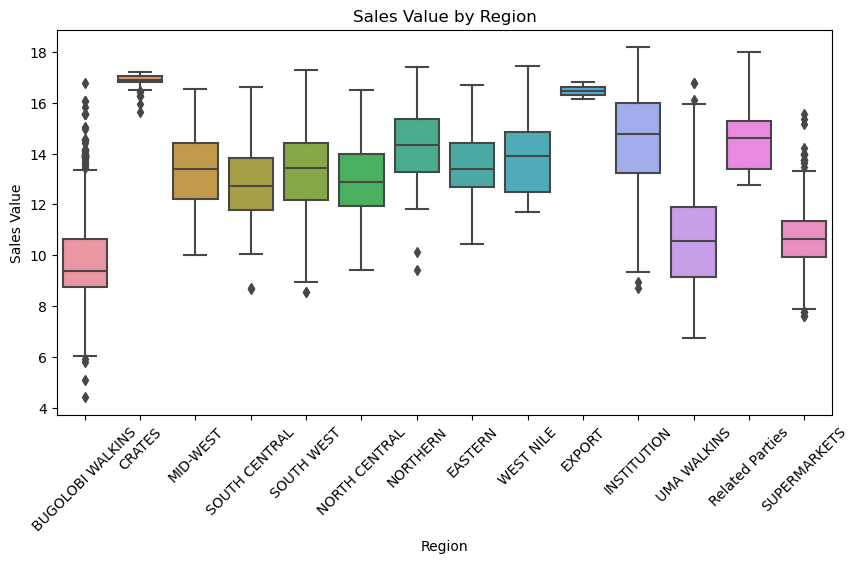

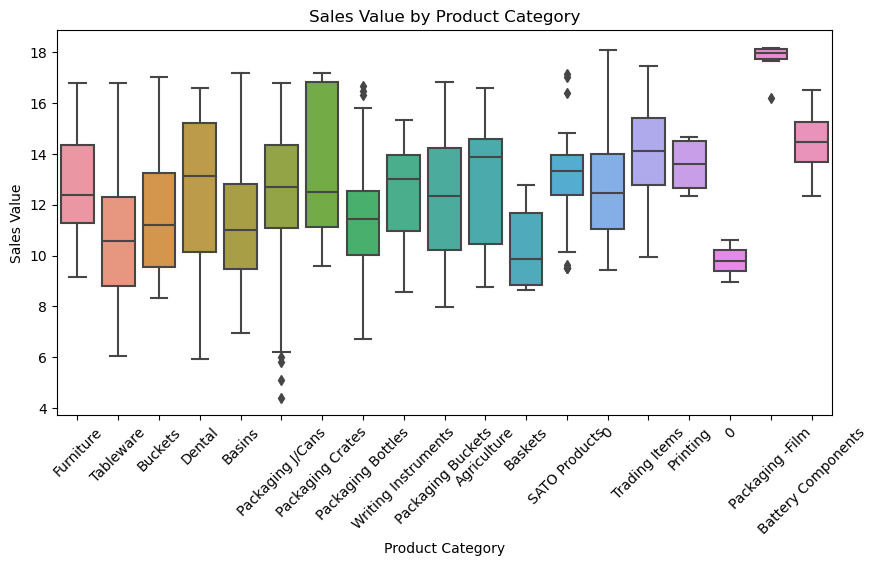

In [806]:
# Analyzing Sales by Categorical Variables
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col], y=data['log_sales_value'])
    plt.title(f"Sales Value by {col}")
    plt.xlabel(col)
    plt.ylabel("Sales Value")
    plt.xticks(rotation=45)
    plt.show()


In [807]:
# Define columns to keep
columns_to_keep = ['Region', 'Channel', 'Product Category', 'log_sales_value']

# Filter data
data = data[columns_to_keep]

In [808]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 0 to 7498
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            4922 non-null   object 
 1   Channel           4922 non-null   object 
 2   Product Category  4922 non-null   object 
 3   log_sales_value   4922 non-null   float64
dtypes: float64(1), object(3)
memory usage: 192.3+ KB


In [812]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=['Region', 'Channel', 'Product Category'])

In [814]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 0 to 7498
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   log_sales_value                       4922 non-null   float64
 1   Region_BUGOLOBI WALKINS               4922 non-null   bool   
 2   Region_CRATES                         4922 non-null   bool   
 3   Region_EASTERN                        4922 non-null   bool   
 4   Region_EXPORT                         4922 non-null   bool   
 5   Region_INSTITUTION                    4922 non-null   bool   
 6   Region_MID-WEST                       4922 non-null   bool   
 7   Region_NORTH CENTRAL                  4922 non-null   bool   
 8   Region_NORTHERN                       4922 non-null   bool   
 9   Region_Related Parties                4922 non-null   bool   
 10  Region_SOUTH CENTRAL                  4922 non-null   bool   
 11  Region_SOUTH WEST     

In [816]:
# Replace 0s and 1s with False and True
data = data.replace({True: 1, False: 0})
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 0 to 7498
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   log_sales_value                       4922 non-null   float64
 1   Region_BUGOLOBI WALKINS               4922 non-null   int64  
 2   Region_CRATES                         4922 non-null   int64  
 3   Region_EASTERN                        4922 non-null   int64  
 4   Region_EXPORT                         4922 non-null   int64  
 5   Region_INSTITUTION                    4922 non-null   int64  
 6   Region_MID-WEST                       4922 non-null   int64  
 7   Region_NORTH CENTRAL                  4922 non-null   int64  
 8   Region_NORTHERN                       4922 non-null   int64  
 9   Region_Related Parties                4922 non-null   int64  
 10  Region_SOUTH CENTRAL                  4922 non-null   int64  
 11  Region_SOUTH WEST     

In [818]:
print(data.head())

   log_sales_value  Region_BUGOLOBI WALKINS  Region_CRATES  Region_EASTERN  \
0        13.847029                        1              0               0   
1        10.628153                        1              0               0   
2        10.628153                        1              0               0   
3        10.628153                        1              0               0   
4        10.628153                        1              0               0   

   Region_EXPORT  Region_INSTITUTION  Region_MID-WEST  Region_NORTH CENTRAL  \
0              0                   0                0                     0   
1              0                   0                0                     0   
2              0                   0                0                     0   
3              0                   0                0                     0   
4              0                   0                0                     0   

   Region_NORTHERN  Region_Related Parties  ...  \
0    

In [820]:
#Checking for Multicollinearity -- 
#Due to many one-hot encoded columns, high correlations between independent variables can distort regression results
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting only the independent variables for VIF calculation
X = data.drop(columns=['log_sales_value'])  # Exclude target variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display features with high VIF
print(vif_data[vif_data['VIF'] > 5])  # Typically, VIF > 5 indicates multicollinearity

D:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                 Feature           VIF
0                Region_BUGOLOBI WALKINS  3.183456e+05
1                          Region_CRATES           inf
2                         Region_EASTERN  1.716870e+08
3                          Region_EXPORT           inf
4                     Region_INSTITUTION  6.737176e+07
5                        Region_MID-WEST  4.449655e+08
6                   Region_NORTH CENTRAL  1.917607e+06
7                        Region_NORTHERN  1.062162e+09
8                 Region_Related Parties  9.640544e+07
9                   Region_SOUTH CENTRAL  1.807395e+07
10                     Region_SOUTH WEST  2.694665e+07
11                   Region_SUPERMARKETS           inf
12                    Region_UMA WALKINS  3.767657e+06
13                      Region_WEST NILE  5.938784e+07
14              Channel_BUGOLOBI WALKINS  5.108257e+03
15                        Channel_CRATES           inf
16                  Channel_DISTRIBUTION  1.992458e+06
17        

In [821]:
# Droping regions already in channels and channels already in regions per feature
#Droping the 0 category and Bugolobi Walkins to reduce the multicollinearity issue
data = data.drop(columns=[
    'Region_BUGOLOBI WALKINS',    
    'Region_CRATES',       
    'Region_EXPORT',     
    'Region_INSTITUTION',     
    'Region_CRATES',     
    'Region_Related Parties', 
    'Region_SUPERMARKETS', 
    'Region_UMA WALKINS', 
    'Region_Related Parties', 
    'Channel_BUGOLOBI WALKINS',
    'Channel_DISTRIBUTION',
    'Channel_JeNi',
    'Product Category_0'          
])

In [822]:
# Recalculate VIF
X = data.drop(columns=['log_sales_value'])  # Exclude target variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display updated VIFs
print(vif_data[vif_data['VIF'] > 5])

Empty DataFrame
Columns: [Feature, VIF]
Index: []


In [824]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 0 to 7498
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   log_sales_value                       4922 non-null   float64
 1   Region_EASTERN                        4922 non-null   int64  
 2   Region_MID-WEST                       4922 non-null   int64  
 3   Region_NORTH CENTRAL                  4922 non-null   int64  
 4   Region_NORTHERN                       4922 non-null   int64  
 5   Region_SOUTH CENTRAL                  4922 non-null   int64  
 6   Region_SOUTH WEST                     4922 non-null   int64  
 7   Region_WEST NILE                      4922 non-null   int64  
 8   Channel_CRATES                        4922 non-null   int64  
 9   Channel_EXPORT                        4922 non-null   int64  
 10  Channel_INSTITUTION                   4922 non-null   int64  
 11  Channel_RELATED PARTIE

In [826]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [830]:
# 'data' is our final dataset with features and 'log_sales_value' is the target
X = data.drop(columns=['log_sales_value'])
y = data['log_sales_value']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [832]:
# Check the number of instances in the dataset
num_instances = data.shape[0]
print("Number of instances:", num_instances)

Number of instances: 4922


In [834]:
#linear regression model

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on both the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared, MAE, and RMSE for the training set
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-squared, MAE, and RMSE for the testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print results
print("Linear regression - Training Set Performance:")
print(f"R-squared: {train_r2:.3f}")
print(f"Mean Absolute Error (MAE): {train_mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.3f}\n")

print("Linear regression - Testing Set Performance:")
print(f"R-squared: {test_r2:.3f}")
print(f"Mean Absolute Error (MAE): {test_mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.3f}")

Linear regression - Training Set Performance:
R-squared: 0.681
Mean Absolute Error (MAE): 0.964
Root Mean Squared Error (RMSE): 1.268

Linear regression - Testing Set Performance:
R-squared: 0.652
Mean Absolute Error (MAE): 0.995
Root Mean Squared Error (RMSE): 1.291


In [836]:
#Random Forest model

# Initialize the Random Forest Regressor with some default parameters
# You may want to tune these parameters for better performance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on both the training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate R-squared, MAE, and RMSE for the training set
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-squared, MAE, and RMSE for the testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print results
print("Random Forest - Training Set Performance:")
print(f"R-squared: {train_r2:.3f}")
print(f"Mean Absolute Error (MAE): {train_mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.3f}\n")

print("Random Forest - Testing Set Performance:")
print(f"R-squared: {test_r2:.3f}")
print(f"Mean Absolute Error (MAE): {test_mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.3f}")

Random Forest - Training Set Performance:
R-squared: 0.730
Mean Absolute Error (MAE): 0.870
Root Mean Squared Error (RMSE): 1.166

Random Forest - Testing Set Performance:
R-squared: 0.676
Mean Absolute Error (MAE): 0.947
Root Mean Squared Error (RMSE): 1.246


In [837]:
# Lasso Regression model

# Initialize the Lasso model with alpha parameter
# The alpha parameter controls the strength of the L1 penalty, so you may want to tune it
lasso_model = Lasso(alpha=0.1, random_state=42)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on both the training and testing sets
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Calculate R-squared, MAE, and RMSE for the training set
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-squared, MAE, and RMSE for the testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print results
print("Lasso Regression - Training Set Performance:")
print(f"R-squared: {train_r2:.3f}")
print(f"Mean Absolute Error (MAE): {train_mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.3f}\n")

print("Lasso Regression - Testing Set Performance:")
print(f"R-squared: {test_r2:.3f}")
print(f"Mean Absolute Error (MAE): {test_mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.3f}")

Lasso Regression - Training Set Performance:
R-squared: 0.176
Mean Absolute Error (MAE): 1.661
Root Mean Squared Error (RMSE): 2.038

Lasso Regression - Testing Set Performance:
R-squared: 0.151
Mean Absolute Error (MAE): 1.656
Root Mean Squared Error (RMSE): 2.016


In [840]:
import lime
import lime.lime_tabular
import shap

In [842]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize the LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    mode='regression'
)

# Wrap the prediction function to ensure feature names are used correctly
prediction_fn = lambda x: lasso_model.predict(pd.DataFrame(x, columns=X.columns))

# Choose an observation from the test set to explain
i = 0  # index of the instance you want to explain in X_test
explanation = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=prediction_fn
)

# Show explanation
explanation.show_in_notebook(show_all=False)

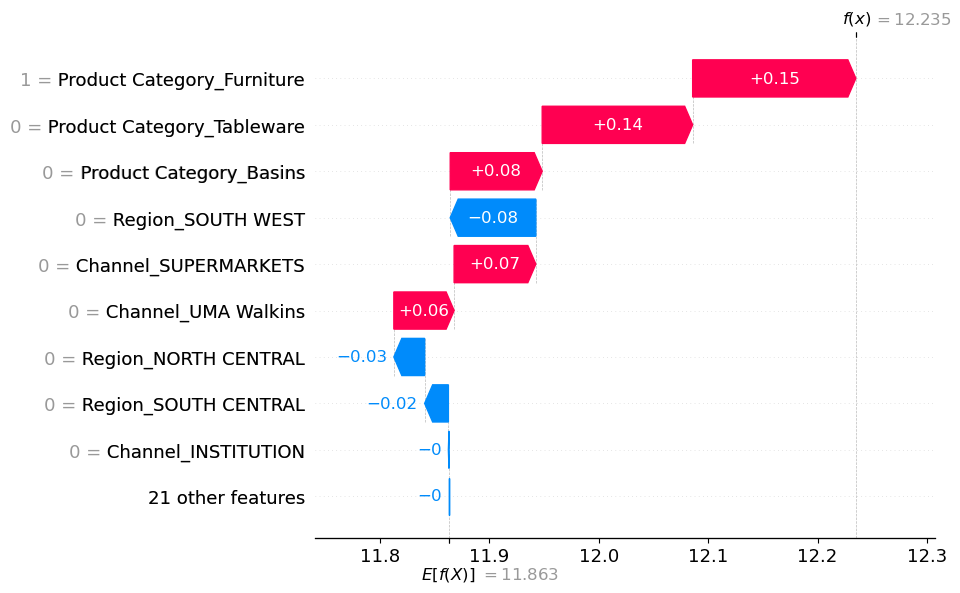

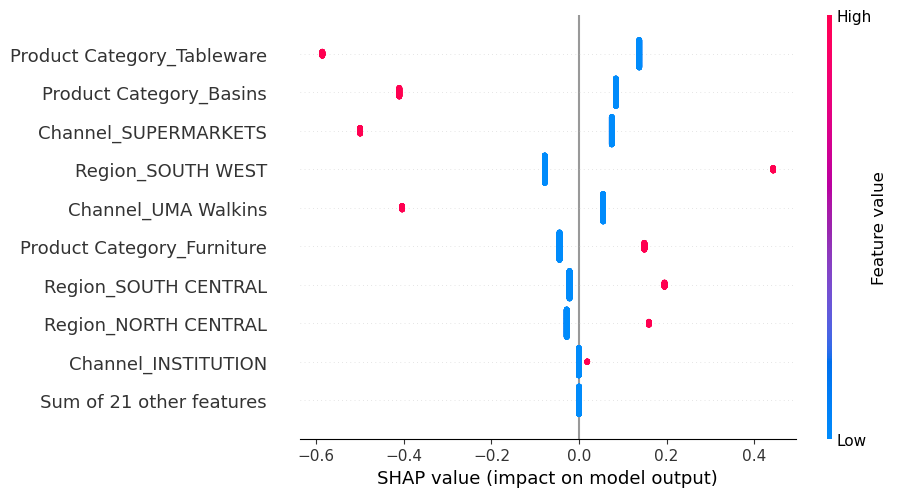

In [844]:
# Initialize SHAP explainer with Lasso Regression model
shap_explainer = shap.Explainer(lasso_model, X_train)

# Calculate SHAP values for test set
shap_values = shap_explainer(X_test)

# Visualize feature importance for a single prediction
shap.plots.waterfall(shap_values[i])  # explains the prediction of the i-th sample in X_test

# Summary plot for all predictions in the test set (global interpretation)
shap.plots.beeswarm(shap_values)